In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\USER\Latihan ML Mandiri\ML Paper RAISE2021\Data.csv")
data

,Unnamed: 0,DEPT,CALI,DTCO_adj,GR,NPHI,RHOB,RESD,DTSM
0,31045,4731.2580,6.01999,79.96725,38.80238,0.25050,2.66556,2.43580,139.85977
1,31046,4731.4104,6.01880,80.34195,35.92152,0.24645,2.66857,2.49118,139.35838
2,31047,4731.5628,6.01880,80.00909,32.95725,0.24084,2.67534,2.74363,139.14355
3,31048,4731.7152,6.01880,79.30257,30.02623,0.23403,2.68653,3.22170,138.78993
4,31049,4731.8676,6.01880,78.37672,27.78731,0.22752,2.70163,3.86510,137.37775
...,...,...,...,...,...,...,...,...,...
3609,34654,5281.2696,5.75321,57.95837,56.51004,0.06369,2.68242,11.67827,109.07732
3610,34655,5281.4220,5.76422,57.95403,53.95823,0.05863,2.68117,16.36135,109.06725
3611,34656,5281.5744,5.77458,57.94971,49.62489,0.05248,2.68051,22.39172,109.05711
3612,34657,5281.7268,5.79369,57.94537,44.21585,0.04640,2.68005,27.36535,109.04709


In [3]:
#inisiasi data target dan predictor
X = data[['DTCO_adj','NPHI','GR','RESD','DEPT']]
y = data[['DTSM']]
print(X.shape)
print(y.shape)

(3614, 5)
(3614, 1)


In [4]:
# Split Data Sumur Kronos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [5]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(X_train,y_train)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [7]:
y_pred = regressor.predict(X_test)
y_test = np.ravel(y_test)
y_pred = np.ravel(y_pred)
DD = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
DD

,Actual,Predicted
0,163.93866,151.936081
1,137.20140,134.575551
2,98.55428,102.761014
3,135.79395,133.818507
4,110.80409,103.315805
...,...,...
1080,99.54908,98.776738
1081,126.60171,121.529454
1082,134.12915,131.492002
1083,97.74401,102.018583


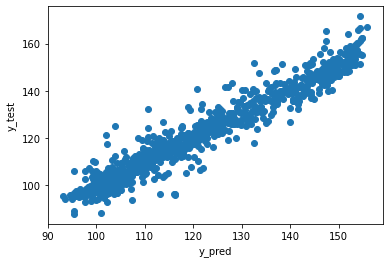

Mean Absolute Error: 2.9694685872019337
Mean Squared Error: 19.52678498395141
Root Mean Squared Error: 4.418912194641505
r2Score :  0.9470817909119944
koefisien korelasi : 0.9738046964078151


In [8]:
plt.scatter (y_pred,y_test)
plt.xlabel("y_pred")
plt.ylabel("y_test")
plt.show()
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2Score : ',r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average'))
Corr=np.corrcoef(y_pred,y_test)
print('koefisien korelasi :', Corr[1,0])

## Hyperparameter Tuning 

In [9]:
from sklearn.model_selection import GridSearchCV

C = np.arange(1, 101, 1)
# C = [0.01, 0.1, 1, 3, 5, 7, 10, 15, 25, 50, 100, 250, 500]
kernel = ['linear', 'poly', 'rbf']
gamma = ['scale', 'auto']
epsilon = np.arange(0.1, 1, 0.1)

clf = GridSearchCV(SVR(), {'C':C}, cv=5, return_train_score=True)

best_model = clf.fit(X_train, y_train)
best_model

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])},
             return_train_score=True)

In [10]:
print('C:', best_model.best_estimator_.get_params()['C'])
# print('kernel:', best_model.best_estimator_.get_params()['kernel'])
# print('C:', best_model.best_params_)

C: 100


In [11]:
clf.cv_results_

{'mean_fit_time': array([0.14781566, 0.15140047, 0.15536447, 0.15937076, 0.16417656,
        0.16995549, 0.17890778, 0.18330908, 0.19287829, 0.18430581,
        0.19106536, 0.19088702, 0.18587632, 0.19007974, 0.19406657,
        0.20185161, 0.1926836 , 0.18967628, 0.19288168, 0.19366875,
        0.19229383, 0.19624848, 0.20462327, 0.2094388 , 0.20942798,
        0.21561527, 0.21181788, 0.22478938, 0.21839118, 0.22800403,
        0.22997198, 0.22797318, 0.21879482, 0.22001934, 0.2267807 ,
        0.2295825 , 0.2255846 , 0.22958946, 0.25072436, 0.23816929,
        0.23298545, 0.24333425, 0.24894505, 0.24474554, 0.23635788,
        0.23537164, 0.2415483 , 0.24556532, 0.24388418, 0.24433708,
        0.23777404, 0.24395666, 0.24972692, 0.2742744 , 0.26868267,
        0.26190562, 0.25412102, 0.27108092, 0.26448121, 0.27366371,
        0.303578  , 0.27167649, 0.27026963, 0.26608839, 0.25831146,
        0.26709032, 0.26568294, 0.26369853, 0.27405868, 0.272085  ,
        0.28182621, 0.2666944 ,

In [12]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.147816,0.002377,0.018349,0.000512,1,{'C': 1},0.934562,0.937158,0.930052,0.940132,...,0.938396,0.006712,100,0.941704,0.940798,0.942909,0.939091,0.936817,0.940264,0.002127
1,0.151400,0.003703,0.018342,0.000488,2,{'C': 2},0.939025,0.941014,0.934287,0.947680,...,0.943775,0.007835,99,0.947067,0.946725,0.948749,0.944543,0.942822,0.945981,0.002071
2,0.155364,0.003053,0.017963,0.000622,3,{'C': 3},0.940445,0.942753,0.935691,0.950563,...,0.945723,0.008263,98,0.949386,0.949122,0.950865,0.946590,0.945247,0.948242,0.002033
3,0.159371,0.005293,0.017953,0.000018,4,{'C': 4},0.941149,0.943850,0.936755,0.952081,...,0.946825,0.008384,97,0.950691,0.950372,0.952274,0.947739,0.946895,0.949594,0.001986
4,0.164177,0.005647,0.017953,0.000006,5,{'C': 5},0.941632,0.944467,0.937549,0.953094,...,0.947530,0.008411,96,0.951563,0.951321,0.953281,0.948484,0.947962,0.950522,0.002002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.305175,0.011213,0.018552,0.000797,96,{'C': 96},0.945989,0.950906,0.940581,0.961800,...,0.952084,0.008334,5,0.959437,0.960243,0.961486,0.957182,0.957946,0.959259,0.001549
96,0.310966,0.006843,0.018741,0.000981,97,{'C': 97},0.946037,0.950931,0.940568,0.961813,...,0.952104,0.008340,4,0.959465,0.960277,0.961522,0.957226,0.957983,0.959295,0.001546
97,0.312956,0.016642,0.018758,0.000422,98,{'C': 98},0.946072,0.950955,0.940567,0.961829,...,0.952126,0.008346,3,0.959493,0.960308,0.961558,0.957273,0.958020,0.959330,0.001542
98,0.318141,0.014318,0.018557,0.000491,99,{'C': 99},0.946105,0.950977,0.940572,0.961834,...,0.952145,0.008346,2,0.959520,0.960341,0.961591,0.957315,0.958052,0.959364,0.001540


In [13]:
# results = df[['param_C', 'param_epsilon', 'param_gamma', 'param_kernel', 'mean_test_score', 'mean_train_score', 'rank_test_score']]
results = df[['param_C', 'mean_test_score', 'mean_train_score', 'rank_test_score']]
results.to_csv("tuning_SVR.csv")
results

,param_C,mean_test_score,mean_train_score,rank_test_score
0,1,0.938396,0.940264,100
1,2,0.943775,0.945981,99
2,3,0.945723,0.948242,98
3,4,0.946825,0.949594,97
4,5,0.947530,0.950522,96
...,...,...,...,...
95,96,0.952084,0.959259,5
96,97,0.952104,0.959295,4
97,98,0.952126,0.959330,3
98,99,0.952145,0.959364,2


In [14]:
print('best score:', clf.best_score_)
print('\nbest parameter:', clf.best_params_)

best score: 0.9521602498410566

best parameter: {'C': 100}


In [15]:
par_C = results["param_C"].values
trn_score = results["mean_train_score"].values
tst_score = results["mean_test_score"].values
par_C

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
       71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87,
       88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100], dtype=object)

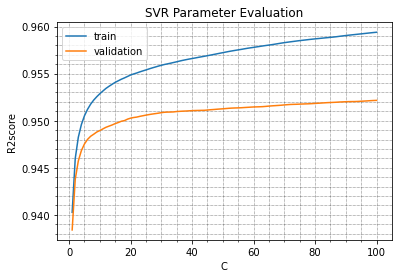

In [16]:
plt.plot(par_C, trn_score, label='train')
plt.plot(par_C, tst_score, label='validation')
plt.title('SVR Parameter Evaluation')
plt.xlabel("C")
plt.minorticks_on()
plt.grid(which='major', linestyle=':', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel("R2score")
plt.legend()
plt.savefig("performance plot SVR.png", dpi=500)
plt.show()

## Train Predicition

In [17]:
ypredtrain = best_model.predict(X_train)

Mean Absolute Error: 2.3011123408534604
Mean Squared Error: 13.961896917161042
Root Mean Squared Error: 3.7365621789501966
r2 Score : 0.9597221696890552


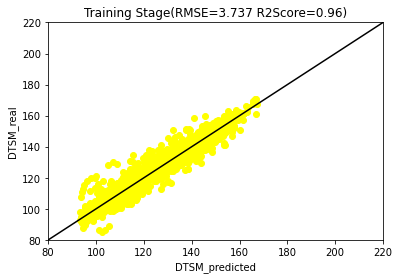

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn import metrics

MAE = metrics.mean_absolute_error(y_train, ypredtrain)
MSE = metrics.mean_squared_error(y_train, ypredtrain)
RMSE = np.sqrt(metrics.mean_squared_error(y_train, ypredtrain))
r2score = r2_score(y_train, ypredtrain, sample_weight=None, multioutput='uniform_average')

print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('r2 Score :', r2score)

t1 = np.str(np.round(RMSE, 3))
t2 = np.str(np.round(r2score, 3))

u = np.arange(80,220,0.01)
i = u
plt.plot(u,i,color='black')
plt.xlim(80,220)
plt.ylim(80,220)
plt.title("Training Stage(RMSE=" + t1 + " R2Score=" + t2 + ")")
plt.scatter (ypredtrain,y_train,color='yellow' )
plt.xlabel("DTSM_predicted")
plt.ylabel("DTSM_real")
# plt.savefig("Train Stage SVR.png", dpi=500)
plt.show()

## Test Predicition 

In [19]:
ypredtest = best_model.predict(X_test)

Mean Absolute Error: 2.338887864677636
Mean Squared Error: 13.113411090418287
Root Mean Squared Error: 3.6212444118587586
r2 Score : 0.9644622383812769


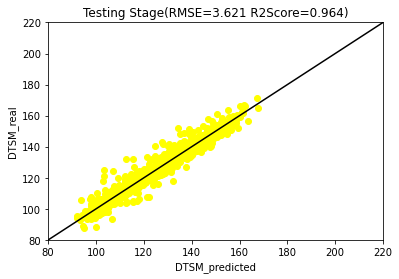

In [20]:
MAE = metrics.mean_absolute_error(y_test, ypredtest)
MSE = metrics.mean_squared_error(y_test, ypredtest)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, ypredtest))
r2score = r2_score(y_test, ypredtest, sample_weight=None, multioutput='uniform_average')

print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('r2 Score :', r2score)

t1 = np.str(np.round(RMSE, 3))
t2 = np.str(np.round(r2score, 3))

plt.plot(u,i,color='black')
plt.xlim(80,220)
plt.ylim(80,220)
plt.scatter (ypredtest, y_test, color='yellow' )
plt.title("Testing Stage(RMSE=" + t1 + " R2Score=" + t2 + ")")
plt.xlabel("DTSM_predicted")
plt.ylabel("DTSM_real")

# plt.savefig("Test Stage SVR.png", dpi=500)
plt.show()

### Use the model to predict all data 

In [21]:
X = scaler.transform(X)
DTSM_predict_final = best_model.predict(X)

In [22]:
y = np.ravel(y)
DTSM_predict_final = np.ravel(DTSM_predict_final)
df=pd.DataFrame({'Actual':y , 'Predicted':DTSM_predict_final})
# print(y.values)
print(df)

         Actual   Predicted
0     139.85977  139.569487
1     139.35838  139.606770
2     139.14355  139.043553
3     138.78993  138.017346
4     137.37775  136.624297
...         ...         ...
3609  109.07732  108.634965
3610  109.06725  108.517460
3611  109.05711  108.395515
3612  109.04709  108.241744
3613  109.03704  107.982830

[3614 rows x 2 columns]


In [23]:
df.to_csv("Hasil_SVR_AllData.csv")

Mean Absolute Error: 2.312453360042511
Mean Squared Error: 13.707163347151115
Root Mean Squared Error: 3.7023186447348255
r2 Score :  0.9601667067193025
koefisien korelasi : 0.9805034874128529


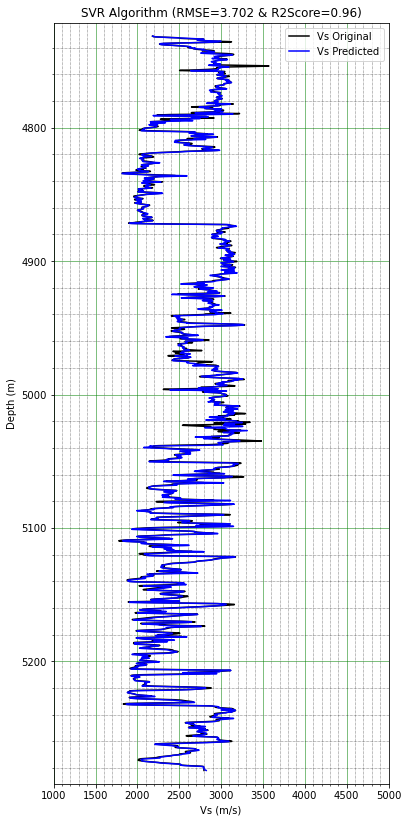

VS_max = 3313.0064392427066
Vs_min = 1816.9784642342158


In [24]:
MAE = metrics.mean_absolute_error(DTSM_predict_final, y)
MSE = metrics.mean_squared_error(DTSM_predict_final, y)
RMSE = np.sqrt(metrics.mean_squared_error(DTSM_predict_final,y))
r2score = r2_score(DTSM_predict_final,y, sample_weight=None, multioutput='uniform_average')
Corr=np.corrcoef(DTSM_predict_final, y)

print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('r2 Score : ', r2score)
print('koefisien korelasi :', Corr[1,0])

t1 = np.str(np.round(RMSE, 3))
t2 = np.str(np.round(r2score, 3))

vs_ori  = 1/y                   # ft/us
vs_pred = 1/DTSM_predict_final  # ft/us
vs_ori  = vs_ori* 10**6 *0.3048 # m/s
vs_pred = vs_pred* 10**6 *0.3048 # m/s

plt.figure(figsize=(6,14))
plt.plot(vs_ori, data['DEPT'], 'k', label='Vs Original')
plt.plot(vs_pred, data['DEPT'], 'b', label='Vs Predicted')
plt.title("SVR Algorithm (RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.ylabel("Depth (m)")
plt.xlabel("Vs (m/s)")
plt.xlim(1000, 5000)
plt.ylim((np.min(data["DEPT"]))-10, (np.max(data["DEPT"]))+10)
plt.gca().invert_yaxis()
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.legend()
plt.savefig("HasilSVR_to_alldepth.png", dpi=500)
plt.show()
print("VS_max =",np.max(vs_pred))
print("Vs_min =",np.min(vs_pred))

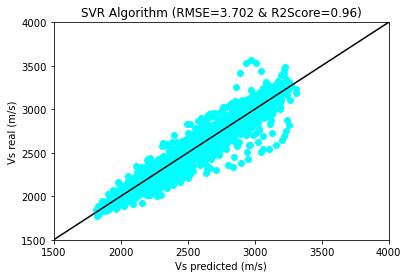

In [25]:
u = np.arange(1500, 4000,0.01)
i = u

plt.scatter (vs_pred, vs_ori, color='cyan')
plt.plot(u, i, color='black')
plt.xlim(1500, 4000)
plt.ylim(1500, 4000)
plt.xlabel("Vs predicted (m/s)")
plt.ylabel("Vs real (m/s)")
plt.title("SVR Algorithm (RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.savefig("Predict Final SVR.png", dpi=500)
plt.show()

# Predict Vs at Poseidon-2

In [26]:
filename2 = "E:\poseidon2.csv"
data2all = np.loadtxt(filename2, skiprows=1,delimiter=',')
mneumonics =  ['DEPT','GR','RESD','DTCO_adj','DTSM','RHOB','NPHI']
data2all = pd.DataFrame(data2all, columns=mneumonics)
data2all[data2all==-999.2500]= np.nan
data2=data2all.dropna()
# data2.head()
data2

,DEPT,GR,RESD,DTCO_adj,DTSM,RHOB,NPHI
8432,4706.0,87.1060,5.2738,63.5098,125.8618,2.7045,18.5850
8433,4706.5,114.0807,14.5054,53.4385,94.4603,2.6881,19.8786
8434,4707.0,132.6039,42.6378,56.3126,104.6554,2.5873,9.4619
8435,4707.5,76.1229,27.6133,60.5667,112.1985,2.5631,7.1419
8436,4708.0,81.0515,9.4066,70.8030,120.3025,2.5848,17.3160
...,...,...,...,...,...,...,...
9610,5295.0,101.7518,93.6949,54.7466,102.9919,2.5844,6.1230
9611,5295.5,106.8450,62.2725,57.1979,97.8452,2.6017,5.3946
9612,5296.0,87.8176,45.4477,58.4825,95.9389,2.6305,5.7106
9613,5296.5,121.3806,49.6154,62.2483,119.2572,2.6382,5.4973


In [27]:
X2 = data2[['DTCO_adj','NPHI','GR','RESD','DEPT']].values
y2 = data2[['DTSM']].values
print(X2.shape)
print(y2.shape)

(1183, 5)
(1183, 1)


In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X2= scaler.fit_transform(X2)

In [29]:
ypredpos2 = best_model.predict(X2)

Mean Absolute Error: 12.016507171200614
Mean Squared Error: 261.44450648280076
Root Mean Squared Error: 16.169245699252663
r2 Score :  0.5558702797229021


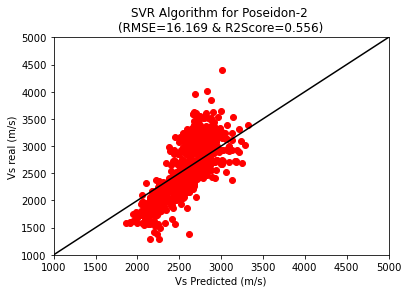

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

MAE = metrics.mean_absolute_error(y2, ypredpos2)
MSE = metrics.mean_squared_error(y2, ypredpos2)
RMSE = np.sqrt(metrics.mean_squared_error(y2, ypredpos2))
r2score = r2_score(y2, ypredpos2, sample_weight=None, multioutput='uniform_average')

print('Mean Absolute Error:', MAE)
print('Mean Squared Error:', MSE)
print('Root Mean Squared Error:', RMSE)
print('r2 Score : ', r2score)

t1 = np.str(np.round(RMSE, 3))
t2 = np.str(np.round(r2score, 3))

vs_ori  = 1/y2                      # ft/us
vs_pred = 1/ypredpos2              # ft/us
vs_ori_pos  = vs_ori* 10**6 *0.3048    # m/s
vs_pred_pos = vs_pred* 10**6 *0.3048   # m/s

plt.scatter (vs_pred_pos, vs_ori_pos, color='red')
s = np.arange(1000, 5000,0.01)
t = s
plt.plot(s,t,color='black')
plt.xlim(1000, 5000)
plt.ylim(1000, 5000)
plt.xlabel("Vs Predicted (m/s)")
plt.ylabel("Vs real (m/s)")
plt.title("SVR Algorithm for Poseidon-2 \n(RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.savefig("Predict POS2 SVR.png", dpi=500)
plt.show()

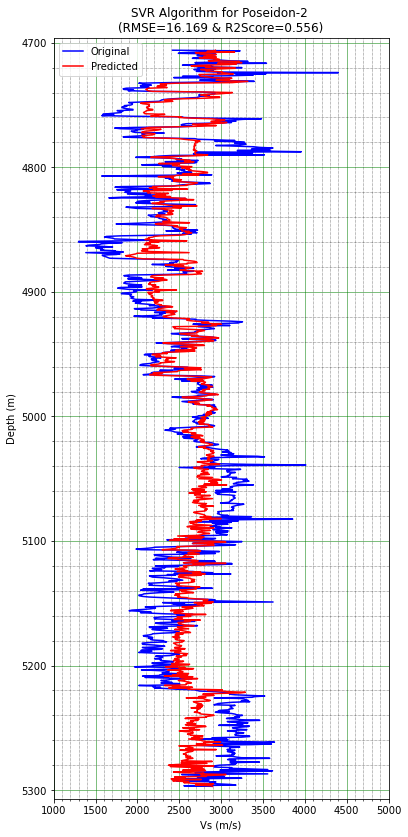

Vs_max = 3318.9701328542415
Vs_min = 1858.8925047246837


In [31]:
plt.figure(figsize=(6,14))
plt.plot(vs_ori_pos, data2['DEPT'],label='Original',color='blue')
plt.plot(vs_pred_pos, data2['DEPT'],label='Predicted',color='red')
plt.title("SVR Algorithm for Poseidon-2 \n(RMSE=" + t1 + " & R2Score=" + t2 + ")")
plt.ylabel("Depth (m)")
plt.xlabel("Vs (m/s)")
plt.xlim(1000, 5000)
plt.ylim((np.min(data2["DEPT"]))-10,(np.max(data2["DEPT"]))+10)
plt.gca().invert_yaxis()
plt.legend()
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig("HasilSVR_poseidon2.png", dpi=500)
plt.show()
print("Vs_max =",np.max(vs_pred_pos))
print("Vs_min =",np.min(vs_pred_pos))